In [ ]:
#run a k means clustering algorithm to get two clusters based on the information contained above
kmeans = KMeans(n_clusters=2, random_state=0).fit(height_weight_norm)
kmeans.labels_

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
height_weight = pd.read_csv('/content/HeightWeight_V3 (3).csv', encoding='latin-1')
height_weight.head()

,Timestamp,Your Section (A or B),Your nickname,Your height (),Your weight (kg),Your shoesize (EU),Your gender
0,11/23/2020 11:26,NaN,Edo,178.0,75.0,43.0,Male
1,11/23/2020 11:26,NaN,Xavier,183.0,66.0,43.0,Male
2,11/23/2020 11:26,NaN,zozo,166.0,NaN,38.0,Female
3,11/23/2020 11:26,NaN,Mo,169.0,69.0,40.5,Male
4,11/23/2020 11:26,NaN,Jojo,167.0,52.0,36.0,Female


In [ ]:
height_weight.columns

Index(['Timestamp', 'Your Section (A or B)', 'Your nickname', 'Your height ()',
       'Your weight (kg)', 'Your shoesize (EU)', 'Your gender'],
      dtype='object')

In [ ]:
height_weight2 = height_weight.drop(['Timestamp', 'Your Section (A or B)', 'Your nickname'], axis=1)
height_weight2.head()

,Your height (),Your weight (kg),Your shoesize (EU),Your gender
0,178.0,75.0,43.0,Male
1,183.0,66.0,43.0,Male
2,166.0,NaN,38.0,Female
3,169.0,69.0,40.5,Male
4,167.0,52.0,36.0,Female


In [ ]:
#do the one to many function for the gender column and create a new column for each value
height_weight2['Female'] = np.where(height_weight2['Your gender'] == 'Female', 1, 0)
height_weight2 = height_weight2.drop(['Your gender'], axis=1)
height_weight2.head()

,Your height (),Your weight (kg),Your shoesize (EU),Female
0,178.0,75.0,43.0,0
1,183.0,66.0,43.0,0
2,166.0,NaN,38.0,1
3,169.0,69.0,40.5,0
4,167.0,52.0,36.0,1


In [ ]:
#replace missing values with the mean for each column
height_weight2 = height_weight2.fillna(height_weight2.mean())
height_weight2.head()

,Your height (),Your weight (kg),Your shoesize (EU),Female
0,178.0,75.000000,43.0,0
1,183.0,66.000000,43.0,0
2,166.0,69.079104,38.0,1
3,169.0,69.000000,40.5,0
4,167.0,52.000000,36.0,1


In [ ]:
#normalize each column apart from "female"
height_weight_norm = height_weight2.copy()

In [ ]:
height_weight_norm['Your height ()'] = (height_weight2['Your height ()'] - height_weight2['Your height ()'].mean()) / height_weight2['Your height ()'].std()
height_weight_norm['Your weight (kg)'] = (height_weight2['Your weight (kg)'] - height_weight2['Your weight (kg)'].mean()) / height_weight2['Your weight (kg)'].std()
height_weight_norm['Your shoesize (EU)'] = (height_weight2['Your shoesize (EU)'] - height_weight2['Your shoesize (EU)'].mean()) / height_weight2['Your shoesize (EU)'].std()
height_weight_norm

,Your height (),Your weight (kg),Your shoesize (EU),Female,height_norm,weight_norm
0,0.297989,3.953337e-01,0.438715,0,0.297989,3.953337e-01
1,0.434616,-2.055895e-01,0.438715,0,0.434616,-2.055895e-01
2,-0.029913,-9.488481e-16,-0.174263,1,-0.029913,-9.488481e-16
3,0.052062,-5.281747e-03,0.132226,0,0.052062,-5.281747e-03
4,-0.002588,-1.140359e+00,-0.419455,1,-0.002588,-1.140359e+00
...,...,...,...,...,...,...
362,-0.111889,-1.006820e+00,-4.005377,1,-0.111889,-1.006820e+00
363,0.352640,2.617953e-01,0.438715,0,0.352640,2.617953e-01
364,0.134038,-6.062050e-01,-0.051668,1,0.134038,-6.062050e-01
365,0.106713,-5.281747e-03,-3.852132,0,0.106713,-5.281747e-03


In [ ]:
#run a k means clustering algorithm to get two clusters based on the information contained above
kmeans = KMeans(n_clusters=2, random_state=0).fit(height_weight_norm)
kmeans.labels_

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
height_weight_norm['cluster'] = kmeans.labels_
height_weight_norm


,Your height (),Your weight (kg),Your shoesize (EU),Female,height_norm,weight_norm,cluster
0,0.297989,3.953337e-01,0.438715,0,0.297989,3.953337e-01,0
1,0.434616,-2.055895e-01,0.438715,0,0.434616,-2.055895e-01,0
2,-0.029913,-9.488481e-16,-0.174263,1,-0.029913,-9.488481e-16,1
3,0.052062,-5.281747e-03,0.132226,0,0.052062,-5.281747e-03,0
4,-0.002588,-1.140359e+00,-0.419455,1,-0.002588,-1.140359e+00,1
...,...,...,...,...,...,...,...
362,-0.111889,-1.006820e+00,-4.005377,1,-0.111889,-1.006820e+00,1
363,0.352640,2.617953e-01,0.438715,0,0.352640,2.617953e-01,0
364,0.134038,-6.062050e-01,-0.051668,1,0.134038,-6.062050e-01,1
365,0.106713,-5.281747e-03,-3.852132,0,0.106713,-5.281747e-03,1


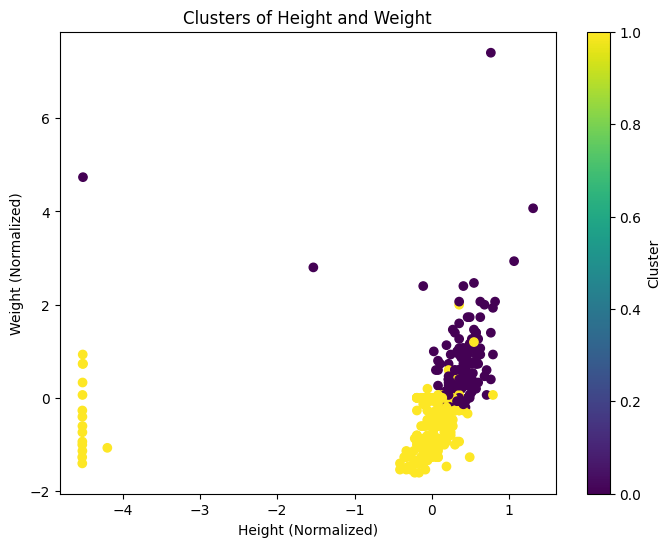

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Scatter plot with color-coded clusters
plt.scatter(height_weight_norm['Your height ()'],
            height_weight_norm['Your weight (kg)'],
            c=kmeans.labels_, cmap='viridis')

plt.xlabel('Height (Normalized)')
plt.ylabel('Weight (Normalized)')
plt.title('Clusters of Height and Weight')

# Optionally, add a colorbar to show cluster mapping
plt.colorbar(label='Cluster')

plt.show()